##Evade Care Road System
A system to complement road users with artificial intelligence aspects.
This system is designed to positively impact on road usage and not affect the general integrity of the road users.

#Importing Necessary Resources

The necessary libraries are in the Keras package. Keras allows us to import predefined data sets; in this case the CIFAR-10. 
####NB
I preferred to work with a relatively smaller dataset. A major improvement on the model would require the use of the ImageNet dataset or any relevant dataset from google or kaggle.

##Importing Data and Libraries

In [ ]:
from PIL import Image
from matplotlib import pyplot as plt
#import pickle
import keras
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
#import urllib.request
import matplotlib.pyplot as plt

#@title Importing Libraries

In [ ]:
from keras.datasets import cifar10
labels = ["Airplane", "Automobile", "Bird", "Cat", "Deer", "Dog", "Frog", "Horse", "Ship", "Truck"]
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
#formatting the dataset to perfection
assert x_train.shape == (50000, 32, 32, 3)
assert x_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape == (10000, 1)

#@title Importing CIFAR-10 Dataset

170508288/170498071 [==============================] - 3s 0us/step


## Quality Assurance

Enter index to view image: 6


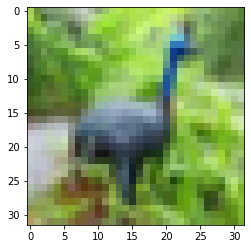

Bird


In [ ]:
index=int(input("Enter index to view image: "))

display_image = x_train[index]
display_label = y_train[index][0]

# Using matplotlib
plt.imshow(display_image)
plt.show()
print(labels[display_label])

#@title Affirming the Import and Labels

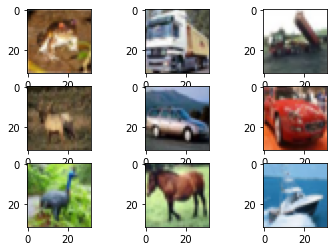

In [ ]:
for i in range(0, 9):
    plt.subplot(3,3,i + 1)
    plt.imshow((x_train[i]))
    #plt.imshow((y_train[i]))
# show the plot
plt.show()

#@title Viewing more data

##Data Preprocessing

In [ ]:
#Converting input into floats
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

#Normalizing the data for array values range of 0 to 1
x_train = x_train / 255.0
x_test = x_test / 255.0

#@title Data formatting

In [ ]:
#Output preprocess
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

#@title Encoding the outputs

In [ ]:
#Assingning values to parameters
lr_rate = 0.01
batch_size = 35
epochs = 3
n_classes = 10

#@title Backend values

#Model Creation and Training

In [ ]:
#creating the three layered neural network model
model = Sequential()

#Layer 1
model.add(Convolution2D(32, kernel_size = (3,3), activation = 'relu', input_shape = (32, 32, 3)))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

#Layer 2
model.add(Convolution2D(64, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

#Layer 3
model.add(Convolution2D(128, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Flatten())  #Flattens the previous layer into a huge vector

#Fully connected layer
model.add(Dense(512, activation = 'relu', kernel_initializer = 'uniform'))
model.add(Dropout(0.30))
model.add(Dense(10, activation = 'softmax'))

#@title Building the Model

In [ ]:
#compile the CNN
#from keras.optimizers import SGD
#sgd = SGD(lr = lr_rate)
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

#@title Compiling the CNN

##Training the Model

In [ ]:
#Fit the CNN model to our dataset
output = model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, validation_data = (x_test, y_test))
model.save("trained_model.h5")

#@title Model fitting

Epoch 1/20
1429/1429 [==============================] - 89s 61ms/step - loss: 1.5930 - accuracy: 0.4132 - val_loss: 1.2712 - val_accuracy: 0.5506
Epoch 2/20
1429/1429 [==============================] - 87s 61ms/step - loss: 1.2488 - accuracy: 0.5528 - val_loss: 1.0826 - val_accuracy: 0.6227
Epoch 3/20
1429/1429 [==============================] - 86s 60ms/step - loss: 1.1309 - accuracy: 0.6008 - val_loss: 0.9818 - val_accuracy: 0.6580
Epoch 4/20
1429/1429 [==============================] - 86s 60ms/step - loss: 1.0564 - accuracy: 0.6277 - val_loss: 0.9408 - val_accuracy: 0.6688
Epoch 5/20
1429/1429 [==============================] - 85s 59ms/step - loss: 0.9990 - accuracy: 0.6452 - val_loss: 0.8913 - val_accuracy: 0.6872
Epoch 6/20
1429/1429 [==============================] - 84s 59ms/step - loss: 0.9601 - accuracy: 0.6624 - val_loss: 0.8869 - val_accuracy: 0.6872
Epoch 7/20
1429/1429 [==============================] - 83s 58ms/step - loss: 0.9299 - accuracy: 0.6713 - val_loss: 0.8794 -

In [ ]:
print(model.evaluate(x_test, y_test))

#@title Model Evaluation

313/313 [==============================] - 5s 14ms/step - loss: 0.7503 - accuracy: 0.7410
[0.7502608299255371, 0.7409999966621399]


Text(0.5, 1.0, 'Accuracy Curves')

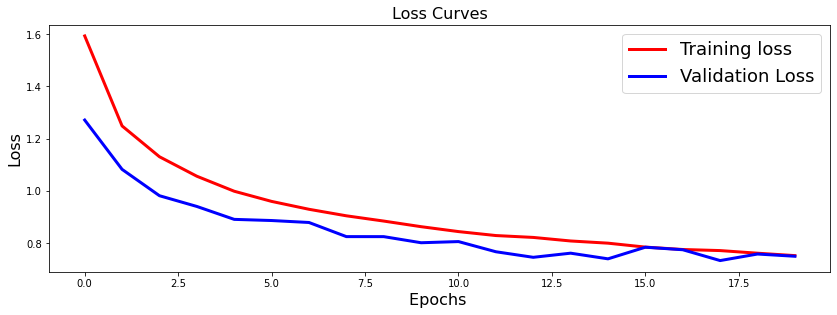

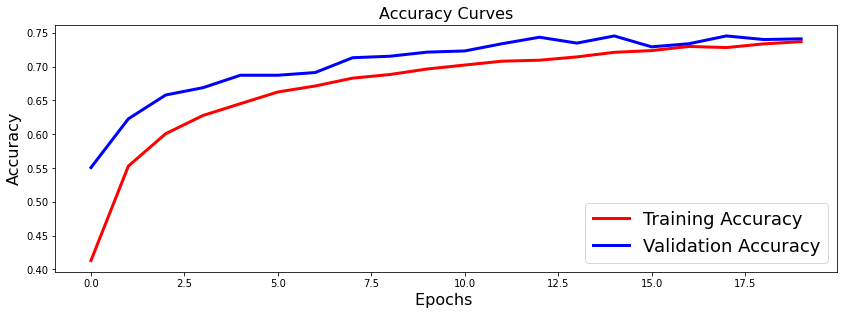

In [ ]:
# Loss Curves
plt.figure(figsize=[14,10])
plt.subplot(211)
plt.plot(output.history['loss'],'r',linewidth=3.0)
plt.plot(output.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
# Accuracy Curves
plt.figure(figsize=[14,10])
plt.subplot(212)
plt.plot(output.history['accuracy'],'r',linewidth=3.0)
plt.plot(output.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

#@title Loss and Accuracy Curves

##Testing the Model

This image is predicted to be a:
Truck


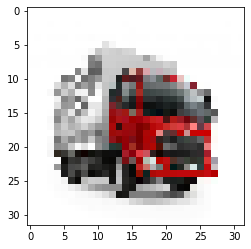

In [ ]:
import numpy as np
import cv2
from keras.models import load_model
from google.colab import files

model = load_model("trained_model.h5")

input_path = r"/content/drive/MyDrive/truck.jpeg"
input_image = Image.open(input_path)
input_image = input_image.resize((32, 32), resample=Image.NEAREST)
image_array = np.array(input_image)
image_array =image_array.astype("float32")
image_array /= 255.0
image_array = image_array.reshape(1, 32, 32, 3)

plt.imshow(input_image)
answer = model.predict(image_array)
input_image.show()

print("This image is predicted to be a:")
print(labels[np.argmax(answer)])

#@title Input-Based Model Testing

#Implementation
The model is set to be implemented in real-time. However, this was not possible due to resource constraints and lack of adequate infrastructure to actualize the same.

##GUI Interface

In [ ]:
!pip install pyngrok
!pip install streamlit

#@title Installing Prerequisites

In [ ]:
%%writefile app.py

import streamlit as st
import tensorflow as tf

st.set_option('deprecation.showfileUploaderEncoding', False)
@st.cache (allow_output_mutation = True)

def load_model():
  model = tf.keras.models.load_model('trained_model.h5')
  return model

model = load_model()
st.write (
    '**Evade Care Road System**'
    )
st.markdown(
    '<style>body{background-color:Blue;} </style>', unsafe_allow_html=True
)
file = st.file_uploader('Please upload an image', type = ['jpeg', 'jpg'])

import cv2
from PIL import Image, ImageOps
import numpy as np

def import_and_predict(image_data, model):
  #image = image.resize((32, 32), resample=Image.NEAREST)
  size = (32, 32)
  image = ImageOps.fit(image_data, size, Image.NEAREST)
  image_array = np.array(image)
  image_array =image_array.astype("float32")
  image_array /= 255.0
  image_array = image_array.reshape(1, 32, 32, 3)
  
    #img = np.asarray(image)
    #img_reshape = img[np.netwaxis, ..]
  labels = ["Airplane", "Automobile", "Bird", "Cat", "Deer", "Dog", "Frog", "Horse", "Ship", "Truck"]
  answer = model.predict(image_array)
  prediction= labels[np.argmax(answer)]
  #index = np.unravel_index(np.argmax(answer))
  return prediction
if file is None:
   st.text("Please upload an image file")
else:
   image = Image.open(file)
   st.image(image, use_column_width= True)
   predictions = import_and_predict(image, model)
   string = "This is most likely: "+ predictions
   st.success(string)

#@title Running streamlit from Colab

Overwriting app.py


In [ ]:
from pyngrok import ngrok
ngrok.kill()

ModuleNotFoundError: ignored

In [ ]:
!ngrok authtoken 23HFEYNjFTc0HGI2rPPBQ80tipv_6wF6DVeiuoJHL6gPWytDd

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [ ]:
from pyngrok import ngrok
#ngrok http 80
url = ngrok.connect(8051)
url

#@title Getting the URL from Ngrok

<NgrokTunnel: "http://d6f8-35-247-118-63.ngrok.io" -> "http://localhost:8051">

In [ ]:
!streamlit run --server.port 8051 app.py >/dev/null

2022-01-10 07:02:00.912475: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


In [ ]:
!cat nohup.out

#@title Monitoring Runtime


  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:8501
  External URL: http://35.196.147.197:8501

